In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import models, layers
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 16
CHANNELS = 3
EPOCHS = 5

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Taro Dataset",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = (BATCH_SIZE))

Found 6254 files belonging to 2 classes.


In [5]:
#training split
train_size = 0.8
len(dataset)*train_size

312.8

In [6]:
train_ds = dataset.take(312)
len(train_ds)

312

In [7]:
#test split
test_ds = dataset.skip(312)
len(test_ds)

79

In [8]:
#validation split 10%
val_size = 0.1
len(dataset)*val_size

39.1

In [9]:
val_ds = test_ds.take(39)
len(val_ds)

39

In [10]:
test_ds = test_ds.skip(39)
len(test_ds)

40

In [11]:
def get_dataset_partitions_tf(ds,train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 1000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
   
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [12]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [13]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [13]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = keras.Sequential([
   
    #first cnn layer
    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (input_shape)),
    keras.layers.MaxPooling2D((2,2)),
    
    #second cnn layer
    keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    #third cnn layer
    keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    #fully connected layer
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = "relu" ),
    keras.layers.Dense(64, activation = "softmax"),
])

model.build(input_shape = input_shape)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [15]:
model.compile(
            optimizer = 'adam',
            loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
            metrics = ['accuracy']
            
) 

In [16]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/5


C:\Users\Acer\anaconda3\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


312/312 [==============================] - 460s 1s/step - loss: 1.8058 - accuracy: 0.7826 - val_loss: 0.3473 - val_accuracy: 0.8494
Epoch 2/5
312/312 [==============================] - 483s 1s/step - loss: 0.3076 - accuracy: 0.8776 - val_loss: 0.2312 - val_accuracy: 0.8894
Epoch 3/5
312/312 [==============================] - 478s 1s/step - loss: 0.2494 - accuracy: 0.8994 - val_loss: 0.2135 - val_accuracy: 0.9231
Epoch 4/5
312/312 [==============================] - 481s 1s/step - loss: 0.2153 - accuracy: 0.9164 - val_loss: 0.1828 - val_accuracy: 0.9263
Epoch 5/5
312/312 [==============================] - 485s 1s/step - loss: 0.1696 - accuracy: 0.9365 - val_loss: 0.1301 - val_accuracy: 0.9551


In [17]:
scores = model.evaluate(test_ds)

40/40 [==============================] - 40s 339ms/step - loss: 0.0989 - accuracy: 0.9641


In [18]:
scores

[0.0989147275686264, 0.964062511920929]

In [19]:
history

In [20]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 312}

In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

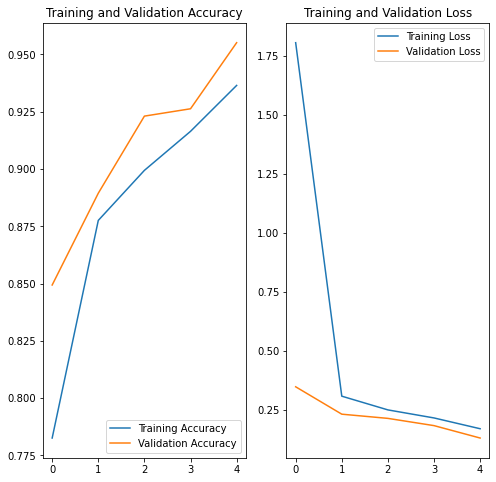

In [23]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
#set variable for class names "leaf blight" and "healthy"
class_names = dataset.class_names
class_names

['taro_healthy', 'taro_leafblight']

first image to predict
actual label: taro_leafblight
1/1 [==============================] - 1s 521ms/step
predicted label: taro_healthy


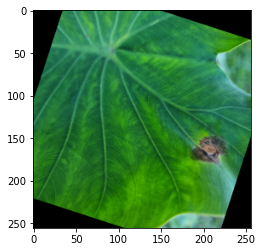

In [28]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[8].numpy().astype('uint8')
    first_label = labels_batch[8].numpy()
    
    print('first image to predict')
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print('predicted label:', class_names[np.argmax(batch_prediction[0])])